# Программирование на языке Python
## Семинар 12. Pandas

Задача - разработать модель, которая бы предсказывали рейтинг ресторана для тех локаций, по которым рейтинг пока не составлен.

In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('zomato.csv', encoding='Windows-1251')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [3]:
# Заметки
#1 Cuisines: пропущенные значения

In [4]:
# Действия
#1 target хорошо бы взвесить на Votes

In [5]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


#### 1. Исследуем таргет

Таргет - 'Aggregate rating'.

In [6]:
df['Aggregate rating'].describe().round(2)

count    9551.00
mean        2.67
std         1.52
min         0.00
25%         2.50
50%         3.20
75%         3.70
max         4.90
Name: Aggregate rating, dtype: float64

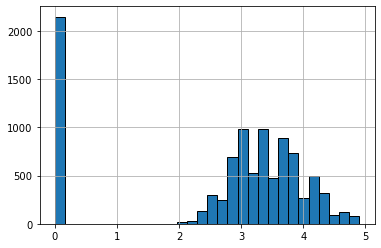

In [7]:
df['Aggregate rating'].hist(bins=30, edgecolor='black');

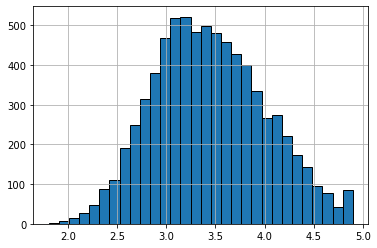

In [8]:
df.loc[df['Aggregate rating'] != 0, 'Aggregate rating'].hist(bins=30, edgecolor='black');

In [9]:
df.loc[df['Aggregate rating'] == 0, :]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
30,6600060,Sandubas Cafн©,30,Brasн_lia,"Edifн_cio Josн© Severo, SCS 6, Bloco A, Loja 9...",Asa Sul,"Asa Sul, Brasн_lia",-47.890167,-15.797000,"Brazilian, Cafe",30,Brazilian Real(R$),No,No,No,No,1,0.0,White,Not rated,2
58,7305048,Quiosque Chopp Brahma,30,Rio de Janeiro,"Madureira Shopping - Loja 289/290, Piso 2, Est...",Madureira,"Madureira, Rio de Janeiro",-43.341164,-22.870413,"Bar Food, Brazilian",70,Brazilian Real(R$),No,No,No,No,3,0.0,White,Not rated,1
69,6710645,Cantinho da Gula,30,SнЈo Paulo,"Rua Pedroso Alvarenga, 522, Itaim Bibi, SнЈo P...",Itaim Bibi,"Itaim Bibi, SнЈo Paulo",-46.675667,-23.581000,Brazilian,55,Brazilian Real(R$),No,No,No,No,2,0.0,White,Not rated,0
77,6701419,Divino FogнЈo,30,SнЈo Paulo,"Shopping MetrнЗ Santa Cruz - Piso L2, Rua Domi...","Shopping MetrнЗ Santa Cruz, Vila Mariana","Shopping MetrнЗ Santa Cruz, Vila Mariana, SнЈo...",-46.637167,-23.599500,"Brazilian, Mineira",65,Brazilian Real(R$),No,No,No,No,3,0.0,White,Not rated,2
78,6703956,Super Grill,30,SнЈo Paulo,"Shopping Morumbi - Piso Lazer, Avenida Roque P...","Shopping Morumbi, Santo Amaro","Shopping Morumbi, Santo Amaro, SнЈo Paulo",-46.698574,-23.622925,Brazilian,50,Brazilian Real(R$),No,No,No,No,2,0.0,White,Not rated,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9109,18277023,Bread & Pasta,1,Noida,"Shop 15, Near HDFC Bank, Tulip Mall, Sector 48...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367303,28.557929,Fast Food,400,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1
9110,18313203,Chillies Cafe,1,Noida,"G-11, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367188,28.557842,Fast Food,600,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,3
9111,18254559,Platters,1,Noida,"Shop 1, Tulip Mall, Near HDFC Bank, Sector 48,...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367322,28.557930,"North Indian, Chinese",500,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,0
9112,18255132,The Grand,1,Noida,"G-5, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367188,28.557852,"Raw Meats, Fast Food",250,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1


In [10]:
df.loc[df['Aggregate rating'] == 0, :].shape[0]

2148

#### 2.1 Определяем фичи

- 'Restaurant Name' - можно взять для генерации фичей с помощью NLP-моделей (а мы пока что просто подготовим переменную к этому);
- 'Country Code' - берем, но надо перевести коды в название;
- 'Address' - отдельные слова точно пригодятся;
- 'Longitude', 'Latitude' - берем без изменений;
- 'Cuisines' - точно берем, надо будет создать дамми-переменные из категорий;
- 'Average Cost for two' - берем, но приводим все к единой валюте;
- 'Currency' - берем, но только если она дает что-то помимо названия страны;
- 'Has Table booking':'Switch to order menu' - берем, перекодируем Yes в 1 и No в 0;
- 'Price range' - точно берем.

In [11]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [12]:
data = df[df['Rating text'] != 'Not rated'].dropna().reset_index(drop=True)

#### 2.2 Исследуем фичи
**Cuisines**

In [13]:
data['Cuisines']

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
7389                             Turkish
7390     World Cuisine, Patisserie, Cafe
7391              Italian, World Cuisine
7392                     Restaurant Cafe
7393                                Cafe
Name: Cuisines, Length: 7394, dtype: object

In [14]:
cuisines_nested = data['Cuisines'].str.split(', ').tolist()
cuisines = pd.Series([c for lst in cuisines_nested for c in lst])

cuisines_counts = cuisines.value_counts()

cuisines_vars = cuisines_counts.index[cuisines_counts.values > 50]  # оставим только эти категории

**Address**

In [15]:
import re
from string import punctuation

punctuation = f'[{re.escape(punctuation.replace("_", ""))}\d]'
punctuation_re = re.compile(punctuation)

def process_address(address):
    address = punctuation_re.sub('', address).lower().split()

    return address

In [16]:
address_nested = data['Address'].map(process_address)
address = pd.Series([c for lst in address_nested for c in lst])

address_counts = address.value_counts()

address_words = address_counts.index[
    (address_counts.values > 100) &
    (address_counts.index.str.len() >= 4)
]

In [17]:
address_words

Index(['delhi', 'road', 'sector', 'market', 'nagar', 'floor', 'near',
       'gurgaon', 'noida', 'shop', 'mall', 'opposite', 'vihar', 'ground',
       'main', 'phase', 'block', 'place', 'colony', 'complex', 'park', 'city',
       'bagh', 'garden', 'plaza', 'centre', 'metro', 'street', 'kailash',
       'hotel', 'chowk', 'greater', 'marg', 'station', 'food', 'enclave',
       'shopping', 'court', 'faridabad', 'plot', 'tower', 'extension',
       'connaught', 'bank', 'town', 'vasant', 'defence', 'safdarjung', 'east',
       'mayur', 'rajinder', 'building', 'central', 'center', 'cyber',
       'rajouri', 'community'],
      dtype='object')

In [18]:
address_counts.index

Index(['new', 'delhi', 'road', 'sector', 'market', 'nagar', 'floor', 'near',
       'gurgaon', 'noida',
       ...
       'silk', 'yenepoya', 'parin', 'kmc', 'mercara', 'trunk', 'woodside',
       'kalikamba', 'gopalkrishna', 'bademaltы±'],
      dtype='object', length=4744)

#### 2.3 Генерируем фичи
- <s>'Restaurant Name' - можно взять для генерации фичей с помощью NLP-моделей (а мы пока что просто подготовим переменную к этому);</s>
- 'Country Code' - берем, но надо перевести коды в название;
- 'Address' - отдельные слова точно пригодятся;
- 'Longitude', 'Latitude' - берем без изменений;
- 'Cuisines' - точно берем, надо будет создать дамми-переменные из категорий;
- 'Average Cost for two' - берем, но приводим все к единой валюте;
- 'Currency' - берем, но только если она дает что-то помимо названия страны;
- 'Has Table booking':'Switch to order menu' - берем, перекодируем Yes в 1 и No в 0;
- 'Price range' - точно берем.

In [19]:
country_codes = pd.read_excel('Country-Code.xlsx')
country_codes

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [20]:
data_model = data.merge(
    country_codes,
    on=['Country Code'],
    how='left',
    validate='m:1'
)

In [21]:
# dummy cols
dummy_mapper = {
    'Yes': 1,
    'No': 0
}

data_model.loc[:, 'Has Table booking':'Switch to order menu'] = data_model.loc[:, 'Has Table booking':'Switch to order menu'].apply(
    lambda col: col.map(dummy_mapper)
)

In [23]:
data_model.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),1,0,0,0,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),1,0,0,0,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),1,0,0,0,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),0,0,0,0,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),1,0,0,0,4,4.8,Dark Green,Excellent,229,Phillipines


In [25]:
data_model[['Country','Currency']].groupby(['Country','Currency']).size()

Country         Currency              
Australia       Dollar($)                   24
Brazil          Brazilian Real(R$)          55
Canada          Dollar($)                    4
India           Indian Rupees(Rs.)        6513
Indonesia       Indonesian Rupiah(IDR)      21
New Zealand     NewZealand($)               40
Phillipines     Botswana Pula(P)            22
Qatar           Qatari Rial(QR)             20
Singapore       Dollar($)                   20
South Africa    Rand(R)                     60
Sri Lanka       Sri Lankan Rupee(LKR)       20
Turkey          Turkish Lira(TL)            34
UAE             Emirati Diram(AED)          60
United Kingdom  Pounds(ЊЈ)                  79
United States   Dollar($)                  422
dtype: int64

In [34]:
## курс местных валют к доллару относительно даты семинара
conversion_rates = {'Dollar($)':1, 'Brazilian Real(R$)':0.2, 'Indian Rupees(Rs.)':0.01, 'Indonesian Rupiah(IDR)':0.000064,
                   'NewZealand($)':0.58, 'Botswana Pula(P)':0.07, 'Qatari Rial(QR)':0.275, 'Sri Lankan Rupee(LKR)':0.0031,
                   'Turkish Lira(TL)':0.035, 'Emirati Diram(AED)':0.27, 'Pounds(ЊЈ)':1.21, 'Rand(R)':0.03
                   }

In [35]:
data_model

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Avg cost
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),1,0,0,0,3,4.8,Dark Green,Excellent,314,Phillipines,77.000
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),1,0,0,0,3,4.5,Dark Green,Excellent,591,Phillipines,84.000
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),1,0,0,0,4,4.4,Green,Very Good,270,Phillipines,280.000
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),0,0,0,0,4,4.9,Dark Green,Excellent,365,Phillipines,105.000
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),1,0,0,0,4,4.8,Dark Green,Excellent,229,Phillipines,105.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7389,5915730,NamlЫ± Gurme,208,ЫБstanbul,"KemankeЃф Karamustafa PaЃфa Mahallesi, RЫ±htЫ±...",Karakн_y,"Karakн_y, ЫБstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),0,0,0,0,3,4.1,Green,Very Good,788,Turkey,2.800
7390,5908749,Ceviz AЫфacЫ±,208,ЫБstanbul,"KoЃфuyolu Mahallesi, Muhittin нмstн_ndaЫф Cadd...",KoЃфuyolu,"KoЃфuyolu, ЫБstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),0,0,0,0,3,4.2,Green,Very Good,1034,Turkey,3.675
7391,5915807,Huqqa,208,ЫБstanbul,"Kuruн_eЃфme Mahallesi, Muallim Naci Caddesi, N...",Kuruн_eЃфme,"Kuruн_eЃфme, ЫБstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),0,0,0,0,4,3.7,Yellow,Good,661,Turkey,5.950
7392,5916112,AЃфЃфk Kahve,208,ЫБstanbul,"Kuruн_eЃфme Mahallesi, Muallim Naci Caddesi, N...",Kuruн_eЃфme,"Kuruн_eЃфme, ЫБstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),0,0,0,0,4,4.0,Green,Very Good,901,Turkey,4.200


In [36]:
data_model['Avg cost'] = data_model['Average Cost for two'] * data_model['Currency'].map(conversion_rates)

In [37]:
data_model.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Avg cost
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),1,0,0,0,3,4.8,Dark Green,Excellent,314,Phillipines,77.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),1,0,0,0,3,4.5,Dark Green,Excellent,591,Phillipines,84.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),1,0,0,0,4,4.4,Green,Very Good,270,Phillipines,280.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),0,0,0,0,4,4.9,Dark Green,Excellent,365,Phillipines,105.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),1,0,0,0,4,4.8,Dark Green,Excellent,229,Phillipines,105.0


In [38]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Country'>

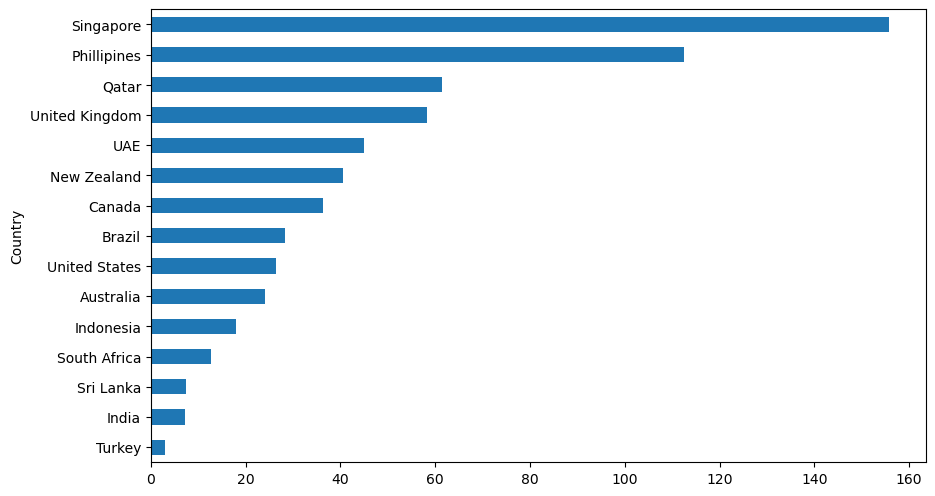

In [39]:
plt.figure(figsize = (8,5), dpi = 100)
data_model.groupby(['Country']).mean()['Avg cost'].sort_values().plot(kind = 'barh', figsize=(10,6))

In [44]:
def contitnent(x):
    if (x in ['United States', 'Canada', 'Brazil']):
        return ('America')
    elif (x in ['India', 'Phillipines', 'Sri Lanka', 'UAE', 'Indonesia', 'Qatar', 'Singapore','Turkey']):
        return ('Asia')
    elif (x in ['Australia', 'New Zealand']):
        return ('Australia_continent')
    elif (x in ['United Kingdom']):
        return ('Europe')
    else:
        return ('Africa')

In [45]:
data_model['Continent']=data_model['Country'].apply(contitnent)
data_model.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Avg cost,Continent
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),1,0,0,0,3,4.8,Dark Green,Excellent,314,Phillipines,77.0,Asia
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),1,0,0,0,3,4.5,Dark Green,Excellent,591,Phillipines,84.0,Asia
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),1,0,0,0,4,4.4,Green,Very Good,270,Phillipines,280.0,Asia
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),0,0,0,0,4,4.9,Dark Green,Excellent,365,Phillipines,105.0,Asia
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),1,0,0,0,4,4.8,Dark Green,Excellent,229,Phillipines,105.0,Asia


In [52]:
ratings = data_model.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,1.8,Red,Poor,1
1,1.9,Red,Poor,2
2,2.0,Red,Poor,7
3,2.1,Red,Poor,15
4,2.2,Red,Poor,27
5,2.3,Red,Poor,47
6,2.4,Red,Poor,87
7,2.5,Orange,Average,110
8,2.6,Orange,Average,191
9,2.7,Orange,Average,250


Text(0.5, 1.0, 'Ratings')

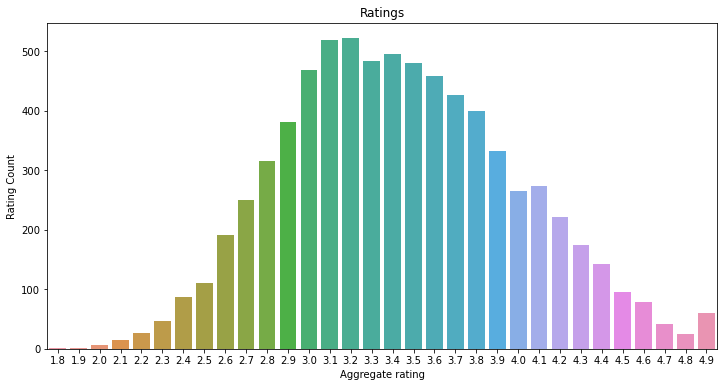

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12,6)
sns.barplot(x='Aggregate rating', y='Rating Count', data=ratings)
plt.title('Ratings')

In [55]:
dict_for_rating = {'Excellent':5, 'Very Good':4, 'Average':2, 'Good':3, 'Poor':1}
data_model['Rating text New'] = [dict_for_rating[item] for item in data_model['Rating text']]

In [57]:
data_model.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Avg cost,Continent,Rating text New
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),1,0,0,0,3,4.8,Dark Green,Excellent,314,Phillipines,77.0,Asia,5
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),1,0,0,0,3,4.5,Dark Green,Excellent,591,Phillipines,84.0,Asia,5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),1,0,0,0,4,4.4,Green,Very Good,270,Phillipines,280.0,Asia,4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),0,0,0,0,4,4.9,Dark Green,Excellent,365,Phillipines,105.0,Asia,5
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),1,0,0,0,4,4.8,Dark Green,Excellent,229,Phillipines,105.0,Asia,5


In [58]:
data_model['Count Cuisines']=data_model['Cuisines'].str.count(',')+1

In [59]:
data_model.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Avg cost,Continent,Rating text New,Count Cuisines
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),1,0,0,0,3,4.8,Dark Green,Excellent,314,Phillipines,77.0,Asia,5,3
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),1,0,0,0,3,4.5,Dark Green,Excellent,591,Phillipines,84.0,Asia,5,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),1,0,0,0,4,4.4,Green,Very Good,270,Phillipines,280.0,Asia,4,4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),0,0,0,0,4,4.9,Dark Green,Excellent,365,Phillipines,105.0,Asia,5,2
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),1,0,0,0,4,4.8,Dark Green,Excellent,229,Phillipines,105.0,Asia,5,2


In [60]:
data_model_for_pred = data_model.drop(['Restaurant ID','Restaurant Name','Country Code','City','Address','Locality',
                                       'Locality Verbose','Longitude','Latitude','Cuisines','Average Cost for two','Currency',
                                       'Rating color','Rating text','Votes'], axis=1)

In [61]:
data_model_for_pred

,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Country,Avg cost,Continent,Rating text New,Count Cuisines
0,1,0,0,0,3,4.8,Phillipines,77.000,Asia,5,3
1,1,0,0,0,3,4.5,Phillipines,84.000,Asia,5,1
2,1,0,0,0,4,4.4,Phillipines,280.000,Asia,4,4
3,0,0,0,0,4,4.9,Phillipines,105.000,Asia,5,2
4,1,0,0,0,4,4.8,Phillipines,105.000,Asia,5,2
...,...,...,...,...,...,...,...,...,...,...,...
7389,0,0,0,0,3,4.1,Turkey,2.800,Asia,4,1
7390,0,0,0,0,3,4.2,Turkey,3.675,Asia,4,3
7391,0,0,0,0,4,3.7,Turkey,5.950,Asia,3,2
7392,0,0,0,0,4,4.0,Turkey,4.200,Asia,4,1


In [76]:
X = data_model_for_pred.drop(['Aggregate rating'], axis=1)
y = data_model_for_pred['Aggregate rating']

In [77]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [78]:
X_train.isnull().sum()

Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Country                 0
Avg cost                0
Continent               0
Rating text New         0
Count Cuisines          0
dtype: int64

In [79]:
X_test.isnull().sum()

Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Country                 0
Avg cost                0
Continent               0
Rating text New         0
Count Cuisines          0
dtype: int64

In [80]:
X_test.fillna(0)

,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Country,Avg cost,Continent,Rating text New,Count Cuisines
5171,0,0,0,0,1,India,3.5,Asia,2,1
5129,0,0,0,0,1,India,3.5,Asia,2,3
5861,0,0,0,0,1,India,2.5,Asia,2,1
3347,1,0,0,0,3,India,18.5,Asia,4,2
7239,0,0,0,0,3,United Kingdom,48.4,Europe,5,2
...,...,...,...,...,...,...,...,...,...,...
3718,0,1,0,0,1,India,3.5,Asia,2,2
2273,0,1,0,0,2,India,7.0,Asia,3,2
4861,1,0,0,0,3,India,15.0,Asia,4,1
2572,0,1,0,0,1,India,4.5,Asia,2,1


In [67]:
X_train.shape

(5175, 10)

In [68]:
X_test.shape

(2219, 10)

In [81]:
X_train.drop(['Country','Continent','Rating text New'], axis=1, inplace=True)
X_test.drop(['Country','Continent','Rating text New'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [82]:
X_train.shape

(5175, 7)

In [83]:
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [84]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [85]:
rfr_pred = rf.predict(X_test)

In [86]:
print("R2_score", r2_score(y_test, rfr_pred))

R2_score 0.3031234897201326
